## <center style="color: blue;"><b>Face recognition with local binary patterns</b></center>


 <center style="color: blue;"><b> Moroccan football players</b></center>


###  By : Mohamed Alaoui Mhamdi & Amallah Naoufal

#### Import libraries

In [8]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
from skimage import feature

#### Face Detection using Haar-Cascade 

In [9]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
img = cv2.imread("pe.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [10]:
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=15)

for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)


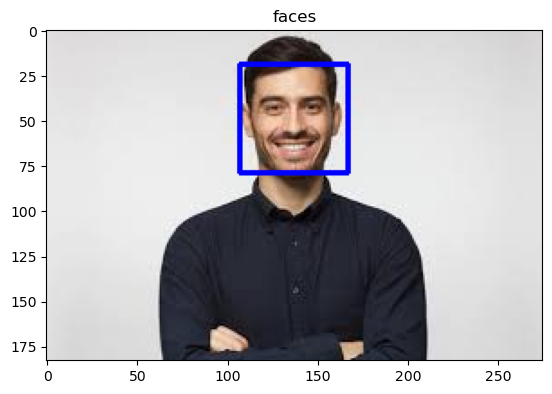

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("faces")
plt.show()

### Crop the face 

In [12]:
for i, (x, y, w, h) in enumerate(faces):
    face = gray[y:y+h, x:x+w]
    face_resized = cv2.resize(face, (100, 100))
    cv2.imwrite(f'face_{i}.jpg', face)


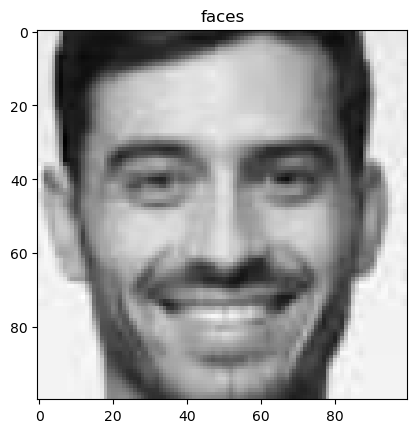

In [13]:
plt.imshow(face_resized ,cmap='gray')
plt.title("faces")
plt.show()

### Feature extraction using lbp

In [14]:
from skimage import feature

def compute_lbp(image,P,R):
    lbp = feature.local_binary_pattern(image, P, R, method="uniform")
    hist= plt.hist(lbp.ravel())
    return lbp.ravel(),hist

array([0., 3., 5., ..., 5., 5., 3.])

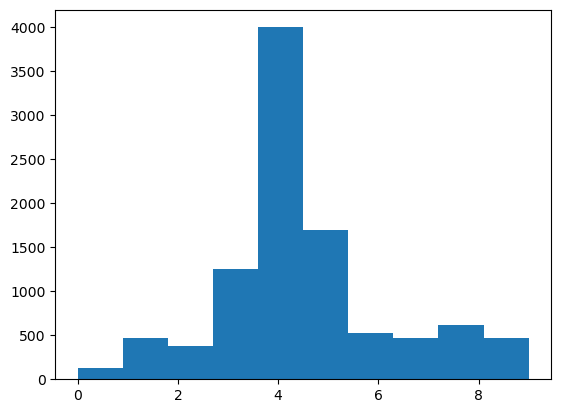

In [15]:
lbp_image,hist = compute_lbp(face_resized,8,1)
lbp_image

### Load table csv 

Our dataset comprises seven classes, each corresponding to a distinct player. We have organized the data in a CSV file with two columns. The first column denotes the image name, following the format "1_xxxxx.jpg," where the numeral before the underscore represents the class of the image. The second column contains the class label assigned to each image.

In [16]:
import pandas as pd 
data = pd.read_csv('balancssed_file.csv')
data.head()

,Image Name,Extracted Number
0,0_63.jp_76a1e0.jpg,0
1,0_49.jp_fe7a0b.jpg,0
2,0_32.jp_89997c.jpg,0
3,0_3.jpg_0143cb.jpg,0
4,0_79.jp_5df4a8.jpg,0


we balancsed the data , each class have the same number of images

In [17]:
value_counts = data['Extracted Number'].value_counts().reset_index()
value_counts.columns = ['Value', 'Count']
# Display the result
print(value_counts)

   Value  Count
0      0   1100
1     10   1100
2     15   1100
3      1   1100
4      2   1100
5      5   1100
6      6   1100


In [18]:
X = data.iloc[:, 0]# X  represent the image names
y = data.iloc[:, 1]# y represent the classes

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)# split the data

In [20]:
y_train

1536    10
4510     2
6505     5
501      0
1649    10
        ..
5226     2
5390     2
860      0
7603     6
7270     6
Name: Extracted Number, Length: 6160, dtype: int64

### feature extraction using lbp for our data


In [21]:
import cv2
import numpy as np

import os 

def compute_lbp(image, P, R):
    # Compute Local Binary Pattern (LBP) features for the given image
    lbp = feature.local_binary_pattern(image, P, R, method="uniform")
    
    # Flatten the LBP matrix to a 1D array
    lbpp = lbp.flatten()
    
    return lbpp

def divide_image(image, num_rows, num_cols):
    # Get the dimensions of the image
    height, width = image.shape
    
    # Calculate the size of each region based on the specified number of rows and columns
    region_height = height // num_rows
    region_width = width // num_cols
    
    regions = []
    
    # Iterate through each region
    for i in range(num_rows):
        for j in range(num_cols):
            # Extract the region from the image
            start_row = i * region_height
            end_row = (i + 1) * region_height
            start_col = j * region_width
            end_col = (j + 1) * region_width
            
            region = image[start_row:end_row, start_col:end_col]
            regions.append(region)
    
    return regions


In [22]:
def lbp_extraction(image):
    # Define the number of rows and columns for dividing the image
    num_rows = 5
    num_cols = 5
    
    # Divide the input image into regions
    image_regions = divide_image(image, num_rows, num_cols)
    
    # Initialize an empty array to store the concatenated LBP vectors
    lbp_vector = np.array([])
    
    # Iterate through each region in the divided image
    for region in image_regions:
        # Compute the Local Binary Pattern (LBP) for the current region
        lbp_image = compute_lbp(region, 16, 2)
        
        # Concatenate the LBP vector of the current region to the overall LBP vector
        lbp_vector = np.concatenate((lbp_vector, lbp_image))
    
    # Return the concatenated LBP vector for the entire image
    return lbp_vector


###  feature extraction using lbp for training data

In [23]:
vec_list=[]
for img in  X_train: 
    img_path = os.path.join('ppp', img)
    imgg = cv2.imread(img_path)
    gray = cv2.cvtColor(imgg, cv2.COLOR_BGR2GRAY)
    lbp=lbp_extraction(gray)
    vec_list.append(lbp)


In [24]:
XX_train= np.array(vec_list)
XX_train

array([[17.,  6., 17., ...,  7.,  6.,  5.],
       [ 3.,  0.,  5., ...,  5.,  6.,  5.],
       [ 5.,  7.,  8., ...,  5.,  2.,  1.],
       ...,
       [ 0.,  0.,  3., ...,  2.,  1.,  1.],
       [ 5.,  6.,  9., ...,  6.,  3.,  1.],
       [ 3.,  0.,  1., ...,  9.,  6.,  0.]])

### feature extractionusing lbp for testing data

In [25]:
vecc_list=[]
for img in  X_test: 
    img_path = os.path.join('ppp', img)
    imgg = cv2.imread(img_path)
    gray = cv2.cvtColor(imgg, cv2.COLOR_BGR2GRAY)
    lbp=lbp_extraction(gray)    
    vecc_list.append(lbp)

In [26]:
XX_test= np.array(vecc_list)
XX_test

array([[ 0.,  1.,  4., ..., 17.,  2.,  1.],
       [ 2.,  2.,  5., ...,  5.,  6.,  5.],
       [17.,  6.,  0., ...,  3.,  1.,  5.],
       ...,
       [ 5.,  6.,  4., ...,  0.,  1.,  1.],
       [ 0.,  0.,  4., ...,  9.,  6.,  5.],
       [ 5., 17.,  0., ..., 17.,  0.,  0.]])

### KNN

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


knn_classifier = KNeighborsClassifier(n_neighbors=1)

knn_classifier.fit(XX_train, y_train)

y_pred_knn = knn_classifier.predict(XX_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy}")

Accuracy: 0.637012987012987


Confusion Matrix:


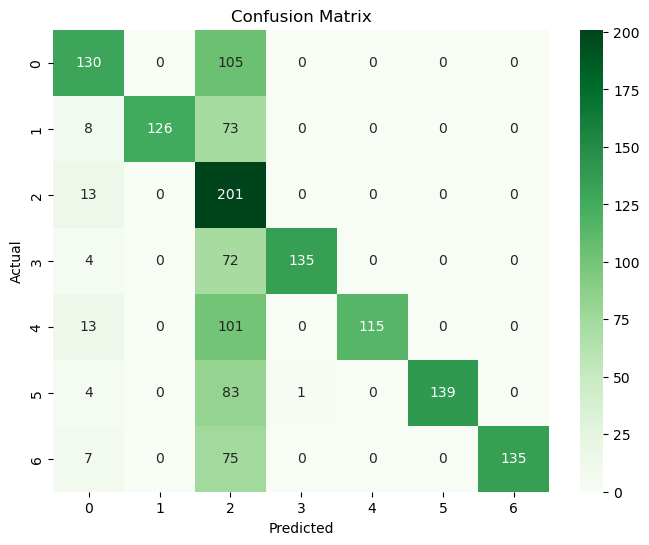

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
y_pred

array([2, 5, 2, ..., 2, 2, 2], dtype=int64)

In [29]:
y_test

3856     1
5965     5
6007     5
7572     6
1488    10
        ..
188      0
2142    10
1201    10
6903     6
2941    15
Name: Extracted Number, Length: 1540, dtype: int64

### SVM

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


svm_classifier = SVC(kernel='linear')
svm_classifier.fit(XX_train, y_train)

predictions = svm_classifier.predict(XX_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7103896103896103


Confusion Matrix:


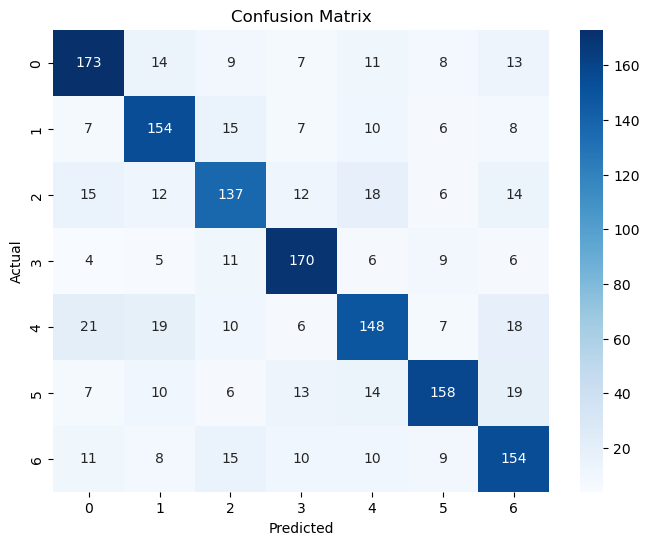

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### lgbmclassifier 

In [34]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.feature import greycomatrix, greycoprops
from skimage.filters import sobel
from skimage.measure import shannon_entropy
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

d_train = lgb.Dataset(XX_train, label=y_train_encoded)

lgbm_params = {
    'learning_rate': 0.05,
    'boosting_type': 'gbdt',  
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'num_leaves': 10,
    'max_depth': 10,
    'num_class': len(np.unique(y_train_encoded))
}

lgb_model = lgb.train(lgbm_params, d_train, 100)  

test_prediction = lgb_model.predict(XX_test)
test_prediction = np.argmax(test_prediction, axis=1)

test_prediction = le.inverse_transform(test_prediction)

print("Accuracy = ", metrics.accuracy_score(y_test, test_prediction))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.836168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 165190
[LightGBM] [Info] Number of data points in the train set: 6160, number of used features: 10000
[LightGBM] [Info] Start training from score -1.963103
[LightGBM] [Info] Start training from score -1.931245
[LightGBM] [Info] Start training from score -1.939115
[LightGBM] [Info] Start training from score -1.935735
[LightGBM] [Info] Start training from score -1.956190
[LightGBM] [Info] Start training from score -1.953897
[LightGBM] [Info] Start training from score -1.942507
Accuracy =  0.7116883116883117


Confusion Matrix:


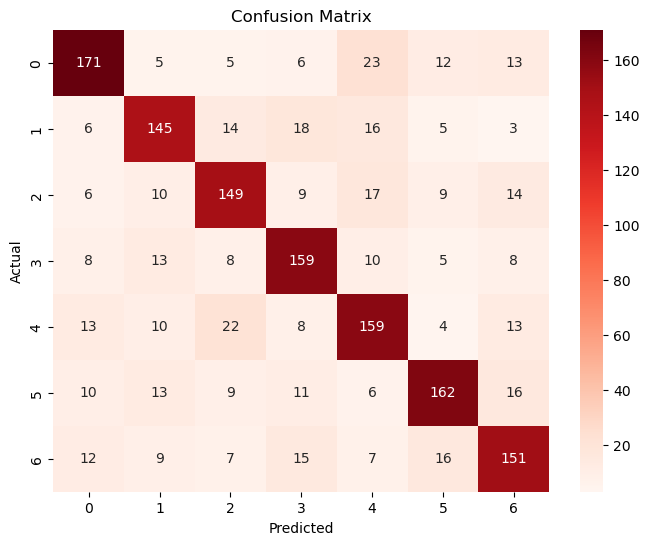

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix:")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### RandomForestClassifier

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(XX_train, y_train)

y_pred = clf.predict(XX_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.66


Confusion Matrix:


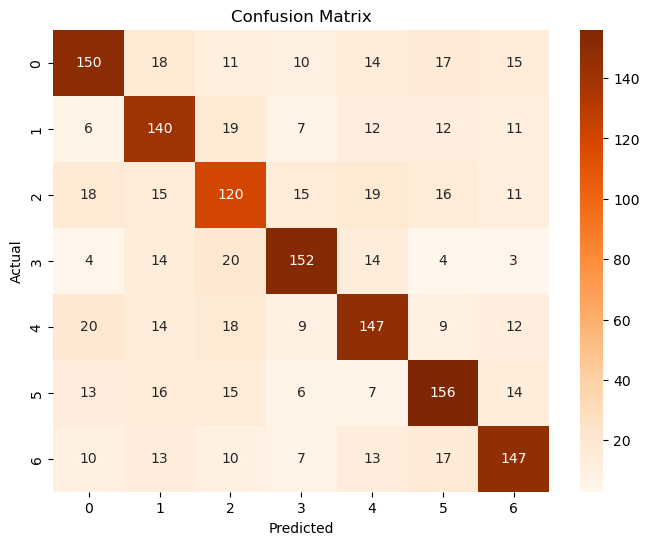

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### CNN

In [45]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt 
import os 
import tensorflow as tf

In [46]:
data = tf.keras.utils.image_dataset_from_directory('data', image_size=(100, 100))

Found 325 files belonging to 7 classes.


In [47]:
data.class_names

['0', '1', '10', '15', '2', '5', '6']

In [48]:
data_iterator = data.as_numpy_iterator()

In [50]:
batch = data_iterator.next()
batch[0].shape

(32, 100, 100, 3)

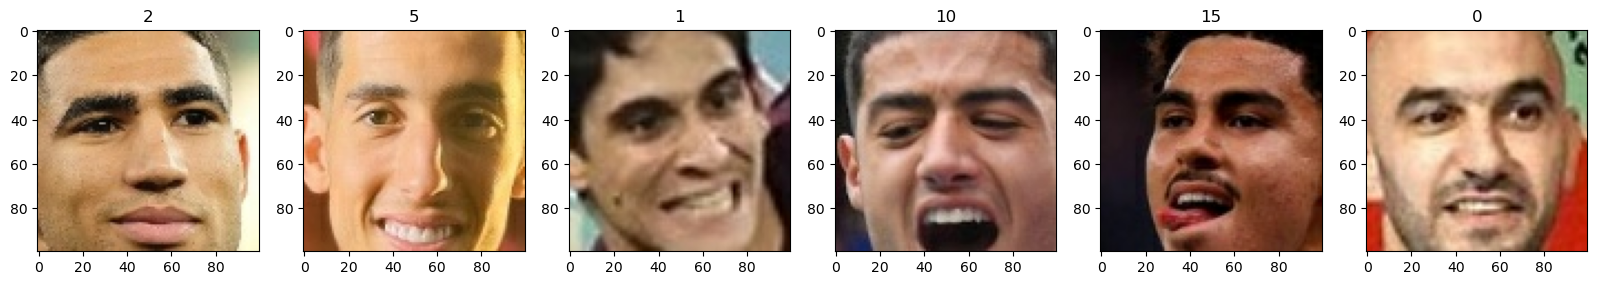

In [51]:
fig, ax = plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(data.class_names[batch[1][idx]])

In [52]:
data = data.map(lambda x,y: (x/255, y))


In [53]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [54]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()
model.add(Conv2D(16, (3, 3), strides=1, activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax') ) 



In [56]:
from tensorflow.keras.optimizers import Adam
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

In [57]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 16)        0

In [58]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [59]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


7/7 [==============================] - 4s 157ms/step - loss: 1.9512 - accuracy: 0.1830 - val_loss: 1.8985 - val_accuracy: 0.2656
Epoch 2/20
7/7 [==============================] - 1s 90ms/step - loss: 1.8981 - accuracy: 0.2009 - val_loss: 1.8561 - val_accuracy: 0.2031
Epoch 3/20
7/7 [==============================] - 1s 79ms/step - loss: 1.8488 - accuracy: 0.2277 - val_loss: 1.7406 - val_accuracy: 0.4062
Epoch 4/20
7/7 [==============================] - 1s 76ms/step - loss: 1.7884 - accuracy: 0.3929 - val_loss: 1.7376 - val_accuracy: 0.4219
Epoch 5/20
7/7 [==============================] - 1s 85ms/step - loss: 1.6032 - accuracy: 0.4420 - val_loss: 1.4826 - val_accuracy: 0.5156
Epoch 6/20
7/7 [==============================] - 1s 84ms/step - loss: 1.3392 - accuracy: 0.5536 - val_loss: 1.2380 - val_accuracy: 0.5625
Epoch 7/20
7/7 [==============================] - 1s 81ms/step - loss: 1.3109 - accuracy: 0.5223 - val_loss: 1.0093 - val_accuracy: 0.6719
Epoch 8/20
7/7 [========

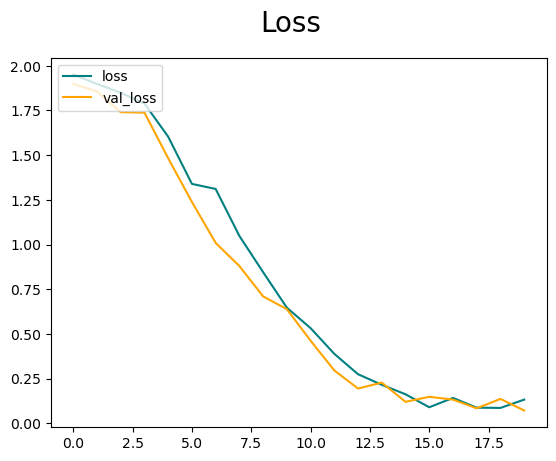

In [60]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

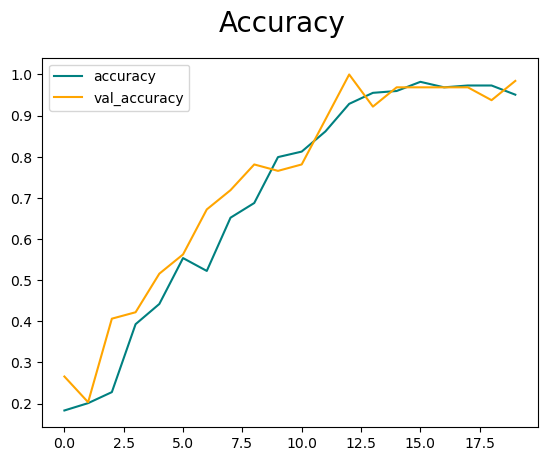

In [61]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [62]:
model.evaluate(test)

2/2 [==============================] - 0s 13ms/step - loss: 0.1669 - accuracy: 0.9189


[0.1668640673160553, 0.9189189076423645]

In [63]:
import tensorflow as tf
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
from keras.utils import to_categorical

pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    n = [np.argmax(element) for element in yhat]
    pre.update_state(y, n)
    re.update_state(y, n)
    acc.update_state(y, n)

# Print the final results after processing all batches
print("Precision:", pre.result().numpy())
print("Recall:", re.result().numpy())
print("Categorical Accuracy:", acc.result().numpy())



1/1 [==============================] - 0s 188ms/step
Precision: 1.0
Recall: 1.0
Categorical Accuracy: 1.0


1/1 [==============================] - 0s 58ms/step


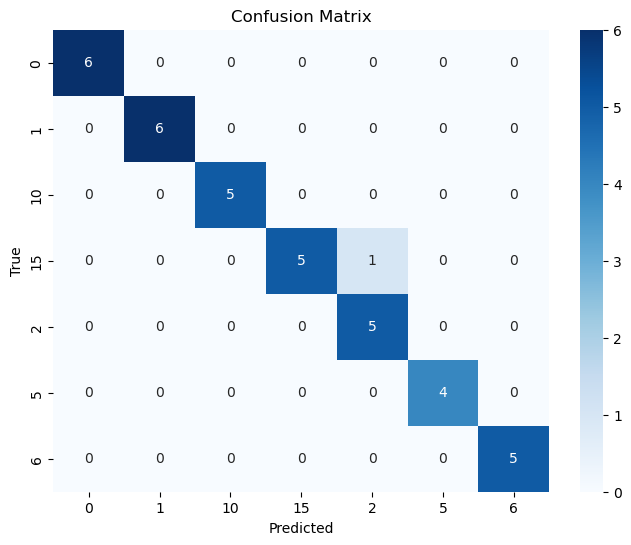

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
classes=['0', '1', '10', '15', '2', '5', '6']

# Assuming you have the true labels (y_true) and predicted labels (y_pred) for your test set
y_true = []
y_pred = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    n = [np.argmax(element) for element in yhat]
    y_true.extend(y)
    y_pred.extend(n)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Create confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [65]:
from sklearn.metrics import confusion_matrix , classification_report

print("Classification Report: \n", classification_report(y_true, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      0.83      0.91         6
           4       0.83      1.00      0.91         5
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         5

    accuracy                           0.97        37
   macro avg       0.98      0.98      0.97        37
weighted avg       0.98      0.97      0.97        37



1/1 [==============================] - 0s 75ms/step
[0, 5, 4, 4, 4, 1, 6, 4, 3, 1, 1, 6, 2, 5, 1, 0, 4, 6, 6, 4, 4, 0, 3, 5, 4, 6, 5, 4, 4, 0, 4, 6] [0 5 4 4 4 1 6 4 3 1 1 6 2 5 1 0 4 6 6 4 4 0 3 5 4 6 5 4 4 0 1 6]


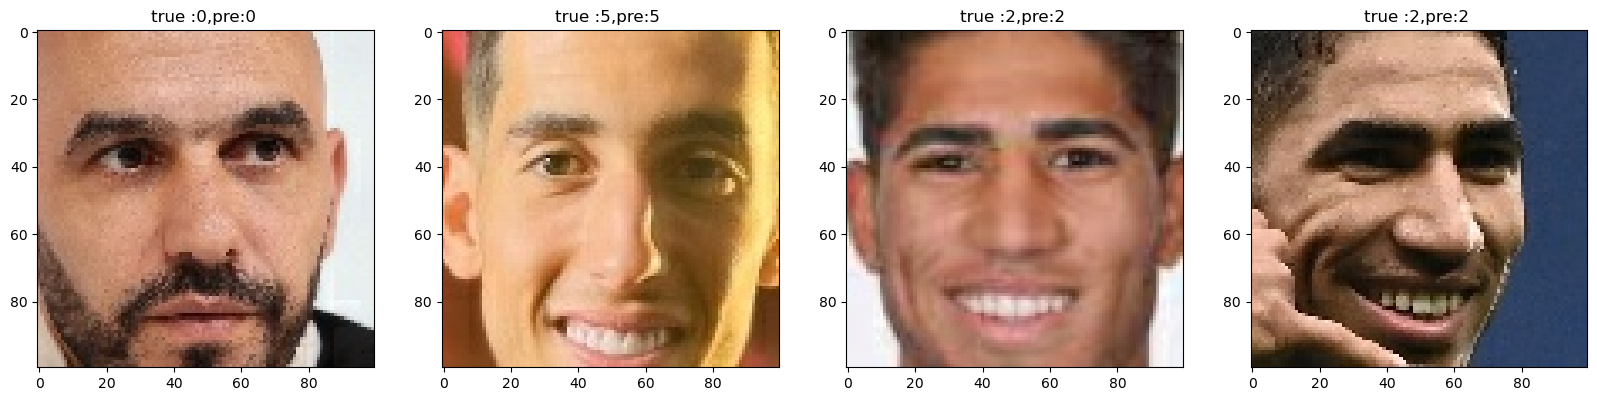

In [67]:
bat=train.as_numpy_iterator()
batch = bat.next()
X, y = batch
yhat = model.predict(X)
n = [np.argmax(element) for element in yhat]
print(n,y)
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(X[:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(f'true :{classes[y[idx]]},pre:{classes[n[idx]]} ')